To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/2020_DS_test/blob/main/2020_test/2021_final.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

Please answer as many of the questions in this notebook as you can.  

**(Q1)**  *(0.5 points)*: Please read the following dataset into a DataFrame:  "https://raw.githubusercontent.com/bwolfson2/2020_DS_test/main/2020_test/fraud_data.csv" and report back the number of unique "transaction_type" values. (Use the same method we usually use to read in csv's)

In [2]:
import os
import numpy as np
import math

import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

import statsmodels.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#YOUR CODE HERE

df = pd.read_csv("https://raw.githubusercontent.com/bwolfson2/2020_DS_test/main/2020_test/fraud_data.csv")

In [3]:
df.head()

,Unnamed: 0,transaction_amt,transaction_type,balance,fraud
0,1,773.18,Retail,2611.78,0
1,2,147.71,Restaurant,1680.93,0
2,3,217.75,Restaurant,2679.79,0
3,4,414.76,Retail,4070.24,1
4,5,32.57,Gas,2109.33,0


**(Q2)**  *(0.5 points)*: Please plot the distribution of each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c7bf6d890>,
      dtype=object)

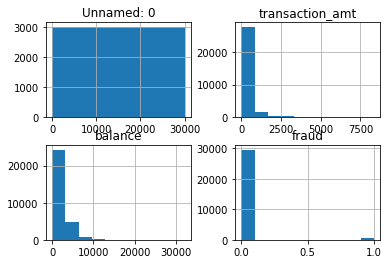

In [4]:
#YOUR CODE HERE
df.hist()

**(Q3)**  *(1 point)*: You will be building a predictor to detect whether a credit card transaction is a `fraud` or not by estimating models using the remaining attributes in the data set.  

Preprocess the data so that the text values are dummy variables numeric and split it into a train and test sample with 30% of the data in the test sample. 

In [5]:
#YOUR CODE HERE
df_dummy = pd.get_dummies(df['transaction_type'])

In [7]:
df_combine = df.join(df_dummy)

In [9]:
df_final = df_combine.drop(columns=['Unnamed: 0','transaction_type'])

In [ ]:
df_final

In [14]:
target = "fraud"
features = df_final.columns[df_final.columns != target]

In [11]:
df_train, df_test = train_test_split(df_final, test_size=.3, random_state=42)

**(Q4)** *(3 points)* Now use `scikitlearn` to fit a Logistic Regression.   *(1 point)*: 

Once you have estimated the model:
* print the model coefficients 
* make predictions using the test data  
* calculate and report the AUC  
* plot the ROC curve   

In [ ]:
#YOUR CODE HERE
logit_model = LogisticRegression(C=1, solver='liblinear')
logit_model.fit(df_train[features], df_train[target])


In [24]:
my_formula=target + ' ~ '
for i in range(len(features)):
    if i > 0:
        my_formula = my_formula + " + "       
    my_formula = my_formula+ features[i]
print("Formula: ", my_formula)

Formula:  fraud ~ transaction_amt + balance + Gas + Restaurant + Retail


In [25]:
import statsmodels.api as sm

model = smf.logit(my_formula, data = df_train) 
logit_model_sm = model.fit()
print(logit_model_sm.summary())

Optimization terminated successfully.
         Current function value: 0.089694
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20995
Method:                           MLE   Df Model:                            4
Date:                Thu, 12 Aug 2021   Pseudo R-squ.:                 0.01544
Time:                        19:13:11   Log-Likelihood:                -1883.6
converged:                       True   LL-Null:                       -1913.1
Covariance Type:            nonrobust   LLR p-value:                 4.545e-12
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.9812   3.02e+06  -9.86e-07      1.000   -5.93e+06    5.93e+06
transaction_am

In [36]:
preds = logit_model.predict(df_test[features])
preds

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.model_selection import cross_val_score
avg_auc = cross_val_score(logit_model, df_train[features], df_train[target], cv=10, scoring="roc_auc").mean()
avg_auc

0.5837166621646972

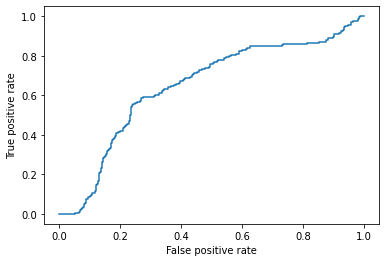

In [34]:
from sklearn.metrics import roc_curve

probs_logit = logit_model.predict_proba(df_test[features])[:, 1]
fpr_logit, tpr_logit, thresholds_logit = roc_curve(df_test[target], probs_logit)
plt.plot(fpr_logit, tpr_logit, label="Logit")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

 (**Q5**)   *(2 points)*:  Interpret the  results of your evaluation of the logit model in two sentences or less.

### YOUR ANSWER HERE

**(Q6)** *(3 points)* Now fit a decision tree to the data. 

Once you have estimated the model:
* make predictions using the test data: 
* calculate and report the AUC 
* plot the ROC curve 

In [43]:
#YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

cart_model = DecisionTreeClassifier(max_depth=3)
cart_model.fit(df_train[features], df_train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
preds_cart = cart_model.predict(df_test[features])
preds_cart

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
avg_auc = cross_val_score(cart_model, df_train[features], df_train[target], cv=10, scoring="roc_auc").mean()
avg_auc

0.877569483724462

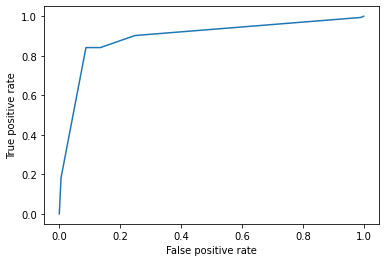

In [45]:
probs_logit = cart_model.predict_proba(df_test[features])[:, 1]
fpr_cart, tpr_cart, thresholds_cart = roc_curve(df_test[target], probs_logit)
plt.plot(fpr_cart, tpr_cart, label="CART")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

 (**Q7**)   *(2 points)*: Interpret the  reslts of your evaluation of the decision tree model in two sentences or less.

#### YOUR ANSWER HERE


Definitely seems that tree model works better than the Logit one. It works better in the beginnig of the curve, which are good news in order to predicts and increase profits. 

 (**Q8**) *(3 points)* Provide in one sentence each:
 * a recommendation for which model you would choose, based only on these results: 
 * a possible explanation for the differences you observed between the models' performance based on your knowledge of theses two modeling approaches 

#### YOUR ANSWER HERE


Based on the information used in these models, I will recommend to use the CART model. The power of this model in better than the logit one even testing using K-flod to test the model in defferent data sets.

A possible explanations is that the data set complexity is high, so the logit model will not performs better than the CART one. Also, The noisy data could be a problem to for the Logit model. It seem that this data set present this two escenarios since the CART performs better than the logit one.